# Billboard Analysis - Average Length of Rank 1

Using the `billboard.py` wrapper, we consolidated 1 year, 3 years, and 5 years worth of weekly "Hot 100" charts into csv's containing each chart's top 100 songs and their rankings. Since each chart is ordered by, or can be grouped by, date, we will be making pycharts that dig deep into the highly sought after Rank 1. In this iPython Notebook, we will be analyzing the distribution of the lengths of time that songs are ranked 1.

Combined below are three plots: a distribution for a song's ranking as number 1 over one year and five years by weeks and a histogram describing the normality of the 5 year plot.

The distribution in the first plot describes the 12 songs most popular in the past year and shows us how popular those 12 songs were relative to each other. The most popular song of the year, "Old Town Road" by Lil Nas X, was the most popular song of the past year. Outside reading shows that this song broke records as it stayed number 1 on the charts for 19 straight weeks. However, as a song that broke records, it is a clear outlier in the first year.

The distribution in the second plot describes the past 5 years in a similar way, but with much more data. With 51 data points, we can see the clear bundling of songs around 5 weeks, the mean of the data. Note the difference in the means between 1-year data and 5-year data, around 15%. The 5-year data was definitely has less spread than the 1-year data, but that decreased spread raised the mean by a small percentage. Further statistical analysis can reveal which points are outliers, but for that we need to test for normality.

The last plot tests for normality over the past five years by binning each result by week. We expect to see a bell curve set up around 5 weeks. However, we can clearly see our data is not normal. The orange line indictes an exponential regression to fit the data, and though it fits the best, it does not accurately describe our data. Normality in events tends to be the result of randomness or through slight perturbations in initial conditions. Our data is skewed because it is biased. Song popularity is complex, and what is lasting is dependent on the people listening. 

# 1-year and 5-year Scatter plots and 5-year Histogram

In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import numpy as np

%matplotlib inline

# Import billboard data

charts_1 = pd.read_csv("./Resources/billboard_1_year.csv") # 1 Year data
charts_3 = pd.read_csv("./Resources/billboard_3_year.csv") # 3 Year data
charts_5 = pd.read_csv("./Resources/billboard_5_year.csv") # 5 Year data

# Function Definitions

def exp_reg(x,a,b):
    return a*np.exp(-b*x)

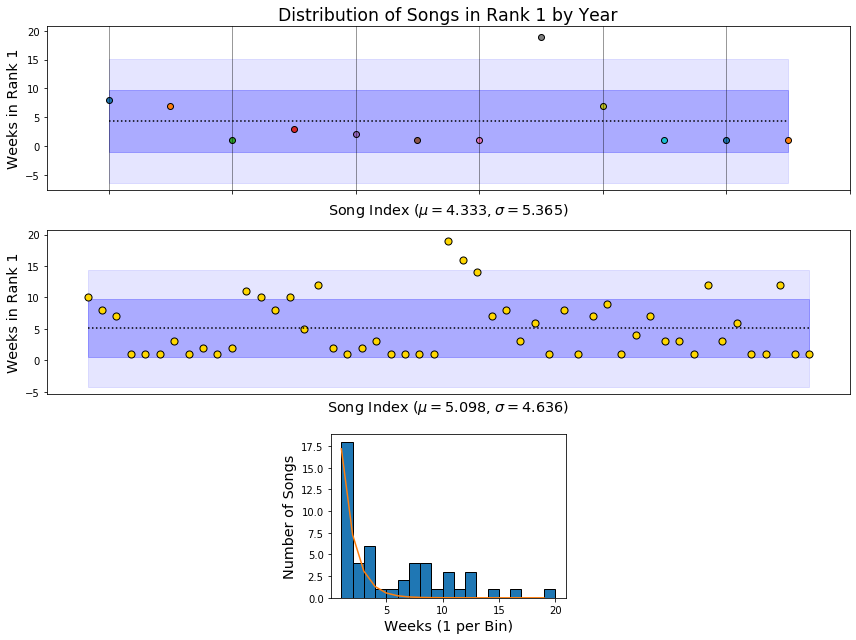

In [2]:
### Plotting ###

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,1])

## ax1 - year 1 demo ##

    # Group-by rank, then get group for rank 1 ("1")
charts_1_gb = charts_1.groupby("rank")
rankone_1 = charts_1_gb.get_group(1)

    # Define group-by for artist and title for rankone_1
rankone_1_gb = rankone_1.groupby(['artist', 'title'])

    # Calculate the amount of weeks each artist-title pair has via count()
rankone_1_frac = rankone_1_gb.count().reset_index().drop(columns=['Unnamed: 0'])

    # Mean and Std Deviation
weeks_bar = rankone_1_frac['weeks'].mean()
sigma = rankone_1_frac['weeks'].std()

ax1.hlines(y=weeks_bar,xmin=0, xmax=11, ls="dotted") # Mean
ax1.fill_between(x=np.arange(12), y1=weeks_bar-2*sigma, y2=weeks_bar+2*sigma, color='blue', alpha=.10)
ax1.fill_between(x=np.arange(12), y1=weeks_bar-sigma, y2=weeks_bar+sigma, color='blue', alpha=.25)

    # Labels and Plots
labels = []
for t in rankone_1_frac.itertuples():
    ax1.scatter(x=[t[0]], y=[t[4]], edgecolor='k')
    labels.append(f"{t[2]}")

labels[9] = 'Sunflower'

ax1.set_xlim((-1,12))
ax1.set_xticklabels([])
ax1.grid(axis='x', alpha=.5, color='k')

ax1.set_ylabel("Weeks in Rank 1", fontsize="x-large")
ax1.set_xlabel(f"Song Index ($\mu = {weeks_bar:.3f}, \sigma = {sigma:.3f}$)", fontsize='x-large')

## ax2 - 5 year demo ##

    # Group-by rank, pull 1
rankone_5 = charts_5.groupby('rank').get_group(1)

    # Group-by (artist,title): count weeks
rankone_5 = rankone_5.groupby(['artist', 'title']).count()

    # x_axis values
x5 = np.arange(rankone_5['weeks'].size)

    # y_axis values
percents_5 = rankone_5['weeks'].to_numpy()

    # Mean and std deviation
rank_mu = rankone_5['weeks'].mean()
rank_sigma = rankone_5['weeks'].std()

    # Standard deviation
ax2.hlines(y=rank_mu ,xmin=0, xmax=np.amax(x5), ls="dotted")
ax2.fill_between(x=x5, y1=rank_mu-2*rank_sigma, y2=rank_mu+2*rank_sigma, color='blue', alpha=.10)
ax2.fill_between(x=x5, y1=rank_mu-rank_sigma, y2=rank_mu+rank_sigma, color='blue', alpha=.25)

    # Plotting
ax2.scatter(x5, percents_5, edgecolor='k', label='Year 4-5', color='gold', s=50)

ax2.set_xlabel(f'Song Index ($\mu = {rank_mu:.3f}$, $\sigma = {rank_sigma:.3f}$)', size='x-large')
ax2.set_ylabel('Weeks in Rank 1', size='x-large')
ax2.set_xticks([])
ax2.grid(axis='x', alpha=.5, color='k')

## ax3 - histogram demo ##

    # Histogram
n, bins, patches = ax3.hist(percents_5, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], edgecolor='k')
    
    # Regression
x = np.arange(1,20,1)
popt, pcov = curve_fit(exp_reg, x, n)

ax3.plot(x, exp_reg(x, *popt))
ax3.set_xlabel("Weeks (1 per Bin)", fontsize='x-large')
ax3.set_ylabel("Number of Songs", fontsize='x-large')

# Final plt.show() and savefig()
ax1.set_title("Distribution of Songs in Rank 1 by Year", fontsize='xx-large')
plt.tight_layout()

plt.savefig('./rank1_distribution.png')
plt.show()